# "Single-column" set for Test 1: ecRad input file creation.

### Test 1: Cloud temperature (Altitude test)

#### Version 7a: 2024-07-25

Preparing matrix of 1D columns .nc file and formatting for input ecRad file (Useful for TripleClouds Solver).

Fixed parameters:
1. Radiative Transfer Model: ecRad.
2. Tropical sounding (Lapse Rate of $6.7\;K/km$ (see on next cells below)).
3. Cosine of solar zenith angle: $\mu = 0.6$ (effective solar zenith angle of $53^{\circ}$, Wallace&Hobbs, 2006).
4. SW albedo: $\alpha = 0.05$ (Hartmann & Berry, 2017).
5. LW emissivity: $\epsilon = 0.97$ (REFERENCE?).
6. Skin temperature as surface temperature: $T_{skin} = 300 K$ (290 to 300 K (Jin & Dickinson, 2010)).
7. Gases: CO$_2$ = 390.1ppm, CH$_4$ = 1.8ppm, N$_2$O = 322ppb, O$_2$ = 0.20942ppm, from 2012 climatology used in ICON run scripts.
8. No liquid water.
9. No aerosols.
10. Solver: Tripleclouds.

Variable parameters:
1. Macro (<b>TEST 1</b>):  Temperature from 236 K to 200 K for cloud middle level (Associated with Position-Altitude).
2. Macro: Geometrical Depth $\Delta h = 1.5 km$.
3. Macro: Ice Water Path (IWP) = 30 $g/m^2$ (Around Anvil Cirrus IWP typical value (Sokol & Hartmann 2020)):

    $$IWP \;=\; \int{IWC\;dz} \;=\; \int_{h_1}^{h_2}{q_i\;\rho(z)\;dz} \;=\; 30\;\frac{g}{m^2}\;\;\; , \;\;\;(h_2 - h_1 = 1.5 \;km)$$

    where IWC is the Ice Water Content $(g/m^3)$, which is the Ice Water Mixing Ratio $q_{i}\;(g/kg)$ times the density $\rho(z)$:

    $$\Rightarrow\;q_i = \frac{30\;g/m^2}{\int_{h_1}^{h_2}{\rho(z)\;dz}}$$
4. Micro: Effective Radius $r_e$ = 30 $\mu m$ (Hartmann & Berry, 2017).
5. Ice Optical Schemes (index associated with config file):
        5.1 Fu 1996 and Fu, Yang & Sun 1998 (1O).
        5.2 Yi et al. 2013 (2O).
        5.3 Baran et al. 2016 (3O).
        5.4 Baran et al. 2014 (4O).

### Loading Libraries

In [1]:
import numpy as np # Version used here: 1.23.4 (python 3.8.15)
import pandas as pd # Version used here: 1.5.2 (python 3.8.15)
import xarray as xr # Version used here: 2022.11.0 (python 3.8.15)
from scipy import interpolate # Version used here: 1.10.0 (python 3.8.15)

import matplotlib.pyplot as plt # Version used here: 3.6.2 (python 3.8.15)
from matplotlib import cm

%matplotlib notebook

## Checking tropical sounding

Directories from UofArizona HPC server:

In [2]:
tropical_profile = pd.read_csv('tropical_profile_ellingson_250m.txt', sep = '\s+ ', engine = 'python')

In [3]:
temp            = tropical_profile['temperature (K)'].iloc[::-1]
altitude        = tropical_profile['height (km)'].iloc[::-1] # If this is over sea level, we can use altitude.
tropopause_i    = temp.argmin()
tropopause      = temp.iloc[tropopause_i]
melting_layer_i = (temp - 273.15).abs().argmin()
melting_layer   = temp.iloc[melting_layer_i]

print('Tropopause:', tropopause, 'K at', altitude.iloc[tropopause_i], 'km')
print('Melting Layer:', altitude.iloc[melting_layer_i], 'km')

Tropopause: 195.6 K at 17.0 km
Melting Layer: 4.75 km


### Density Profile $(kg/m^3)$

In [4]:
R         = 287 # J/kgK
density_0 = (tropical_profile['pressure (hPa)']*100)/(tropical_profile['temperature (K)']*R) # [kg m-3]
density   = density_0.iloc[::-1]

<IPython.core.display.Javascript object>


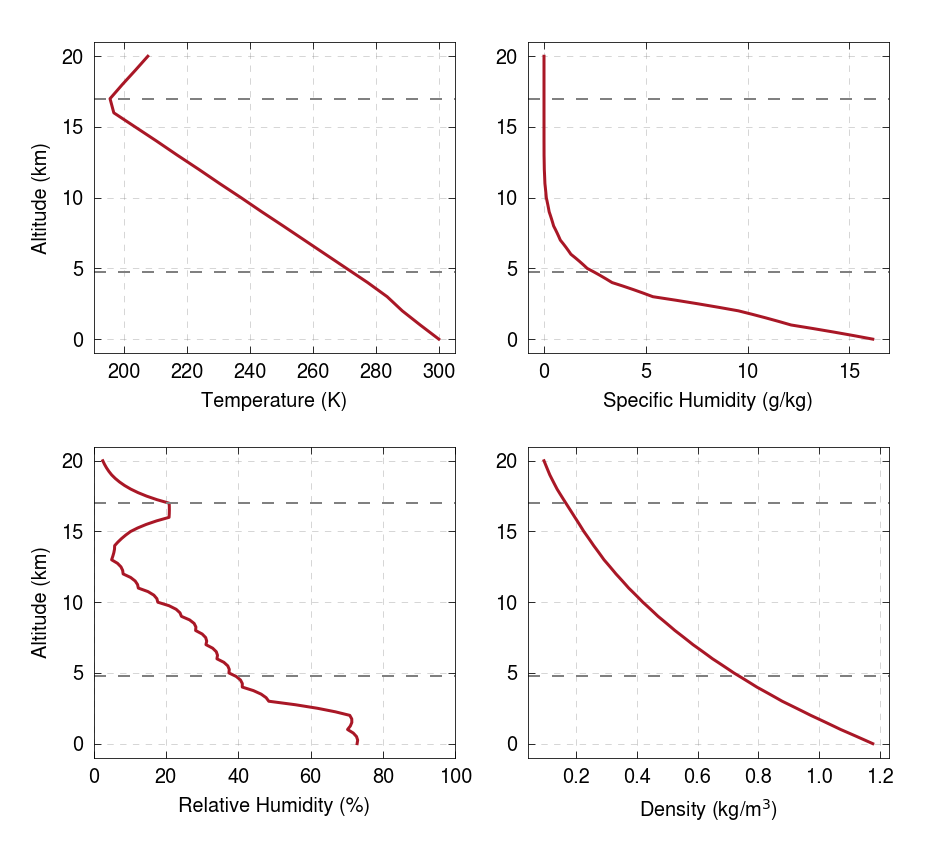

In [5]:
fontname = 'Nimbus Sans' # Arial
fontsize = 20
color    = (169/255,23/255,38/255)
flength   = 13 # inches
fheight   = flength*.9 # inches
f, ax    = plt.subplots(2, 2, figsize=(flength, fheight), dpi=72)
plt.subplots_adjust(top = 0.95, bottom = 0.1, left = 0.1, right = 0.95,
                    hspace = .3, wspace = .2)


# === Subplot 1, 1: ===
h1 = ax[0,0].plot(tropical_profile['temperature (K)'], 
                  tropical_profile['height (km)'],
                  linestyle = 'solid', linewidth = 3,
                  color = color)
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
hline_1 = ax[0,0].axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
hline_2 = ax[0,0].axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)

ax[0,0].grid('on', linestyle = 'dashed', color = 'grey', alpha = .4,
             dashes = (8, 8), linewidth = .8)

# X Axis:
ax[0,0].set_xlabel('Temperature (K)', fontname = fontname, 
                   fontsize = fontsize,
                   color = 'black', labelpad = 10)
ax[0,0].tick_params(axis = 'x', which = 'major', color = 'black',
                    size = 7, direction = 'in', top = True,
                    labelsize = fontsize, pad=10)
ax[0,0].tick_params(axis = 'x', which = 'minor',
                    color = 'black', size = 4,
                    direction = 'in', top = True)
for tick in ax[0,0].get_xticklabels():
    tick.set_fontname(fontname)

# Y Axis:
ax[0,0].set_ylabel('Altitude (km)', fontname = fontname, 
                   fontsize = fontsize,
                   color = 'black', labelpad = 10)
ax[0,0].tick_params(axis = 'y', which = 'major', color = 'black',
                    size = 7, direction = 'in', right = True,
                    labelsize = fontsize, pad = 10)
ax[0,0].tick_params(axis = 'y', which = 'minor', color = 'black',
                    size = 4, direction = 'in', right = True)
for tick in ax[0,0].get_yticklabels():
    tick.set_fontname(fontname)
        
    

# === Subplot 1, 2: ===
h2 = ax[0,1].plot(tropical_profile['specific hum\t(kg/kg)']*1000, 
                  tropical_profile['height (km)'],
                  linestyle = 'solid', linewidth = 3,
                  color = color)
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
hline_1 = ax[0,1].axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
hline_2 = ax[0,1].axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)

ax[0,1].grid('on', linestyle = 'dashed', color = 'grey', alpha = .4,
             dashes = (8, 8), linewidth = .8)

# X Axis:
ax[0,1].set_xlabel('Specific Humidity (g/kg)', fontname = fontname, 
                   fontsize = fontsize,
                   color = 'black', labelpad = 10)
ax[0,1].tick_params(axis = 'x', which = 'major', color = 'black',
                    size = 7, direction = 'in', top = True,
                    labelsize = fontsize, pad=10)
ax[0,1].tick_params(axis = 'x', which = 'minor',
                    color = 'black', size = 4,
                    direction = 'in', top = True)
for tick in ax[0,1].get_xticklabels():
    tick.set_fontname(fontname)
    
# Y Axis:
ax[0,1].tick_params(axis = 'y', which = 'major', color = 'black',
                    size = 7, direction = 'in', right = True,
                    labelsize = fontsize, pad = 10)
ax[0,1].tick_params(axis = 'y', which = 'minor', color = 'black',
                    size = 4, direction = 'in', right = True)
for tick in ax[0,1].get_yticklabels():
    tick.set_fontname(fontname)



# === Subplot 2, 1: ===
h2 = ax[1,0].plot(tropical_profile['RH (%)']*100, # Check the values from real table 
                  tropical_profile['height (km)'],
                  linestyle = 'solid', linewidth = 3,
                  color = color)
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
hline_1 = ax[1,0].axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
hline_2 = ax[1,0].axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)

ax[1,0].grid('on', linestyle = 'dashed', color = 'grey', alpha = .4,
             dashes = (8, 8), linewidth = .8)

# X Axis:
ax[1,0].set_xlabel('Relative Humidity (%)', fontname = fontname, 
                   fontsize = fontsize,
                   color = 'black', labelpad = 10)
ax[1,0].tick_params(axis = 'x', which = 'major', color = 'black',
                    size = 7, direction = 'in', top = True,
                    labelsize = fontsize, pad=10)
ax[1,0].tick_params(axis = 'x', which = 'minor',
                    color = 'black', size = 4,
                    direction = 'in', top = True)
for tick in ax[1,0].get_xticklabels():
    tick.set_fontname(fontname)
ax[1, 0].set_xlim(0, 100)
    
# Y Axis:
ax[1,0].set_ylabel('Altitude (km)', fontname = fontname, 
                   fontsize = fontsize,
                   color = 'black', labelpad = 10)
ax[1,0].tick_params(axis = 'y', which = 'major', color = 'black',
                    size = 7, direction = 'in', right = True,
                    labelsize = fontsize, pad = 10)
ax[1,0].tick_params(axis = 'y', which = 'minor', color = 'black',
                    size = 4, direction = 'in', right = True)
for tick in ax[1,0].get_yticklabels():
    tick.set_fontname(fontname)



# === Subplot 2, 2: ===
h2 = ax[1,1].plot(density_0, 
                  tropical_profile['height (km)'],
                  linestyle = 'solid', linewidth = 3,
                  color = color)
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
hline_1 = ax[1,1].axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
hline_2 = ax[1,1].axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                          dashes = (6, 6), linewidth  =2)

ax[1,1].grid('on', linestyle = 'dashed', color = 'grey', alpha = .4,
             dashes = (8, 8), linewidth = .8)

# X Axis:
ax[1,1].set_xlabel(r'Density (kg/m$^3$)', fontname = fontname, 
                   fontsize = fontsize,
                   color = 'black', labelpad = 10)
ax[1,1].tick_params(axis = 'x', which = 'major', color = 'black',
                    size = 7, direction = 'in', top = True,
                    labelsize = fontsize, pad=10)
ax[1,1].tick_params(axis = 'x', which = 'minor',
                    color = 'black', size = 4,
                    direction = 'in', top = True)
for tick in ax[1,1].get_xticklabels():
    tick.set_fontname(fontname)
    
# Y Axis:
ax[1,1].tick_params(axis = 'y', which = 'major', color = 'black',
                    size = 7, direction = 'in', right = True,
                    labelsize = fontsize, pad = 10)
ax[1,1].tick_params(axis = 'y', which = 'minor', color = 'black',
                    size = 4, direction = 'in', right = True)
for tick in ax[1,1].get_yticklabels():
    tick.set_fontname(fontname)
    
# Save Figure (png or pdf):
out_dir = ('/home/u5/edgardo/p01_crh_sensitivity/out_figures/')
#plt.savefig(out_dir+'tropical_climatology_sounding_v3.png', dpi = 500)

Estimating Lapse Rate:

In [7]:
DT = tropical_profile['temperature (K)'][30] - tropical_profile['temperature (K)'][20]
Dh = tropical_profile['height (km)'][30] - tropical_profile['height (km)'][20]
slope = DT/Dh
print('Lapse Rate: ',slope,' K/km')

Lapse Rate:  -6.7  K/km


## Preparing input table

List of parameters:

- Skin Temperature (for each temperature-perturbation level)
- cos_solar_zenith_angle (for each temperature-perturbation level)
- pressure_hl (half level column)
- temperature_hl (half level column)
- q or h2o_mmr (Specific Humidity (kg/kg)) (level column)
- o3_mmr (Ozone Mass Mixing Ratio (kg/kg)) (level column)
- co2_vmr (mol/mol) (scalar)
- ch4_vmr (mol/mol) (scalar)
- n2o_vmr (mol/mol) (scalar)
- o2_vmr (mol/mol) (scalar)
- q_liquid (Liquid cloud mass mixing ratio (kg/kg)) (level column)
- q_ice (Ice cloud mass mixing ratio (kg/kg)) (level column)
- re_liquid (m) (level column)
- re_ice (m) (level column)
- cloud_fraction (level column)
- sw_albedo (1 value)
- lw_emissivity (1 value)

### 1. Half Level Pressures (Pa)

"The half_level dimension corresponds to the mid-points of the levels, plus the top-of-atmosphere and surface, and so must be one more than level"

In [38]:
pressure_hli = [tropical_profile['pressure (hPa)'].iloc[-1]*100] # Pa
for i in range(len(tropical_profile['pressure (hPa)'])-1):
    pif = tropical_profile['pressure (hPa)'].iloc[-1-(i+1)]*100
    pii = tropical_profile['pressure (hPa)'].iloc[-1-i]*100
    pressure_hli.append((pif+pii)/2)
pressure_hli.append(tropical_profile['pressure (hPa)'].iloc[0]*100) # Pa

### 2. Half Level Temperatures (K)

Interpolation obtained from half level pressures:

In [39]:
temp_int        = interpolate.interp1d(tropical_profile['pressure (hPa)'].iloc[::-1]*100,
                                       tropical_profile['temperature (K)'].iloc[::-1])
temperature_hli = temp_int(pressure_hli)

### 3. Table

Perturbation range:

In [40]:
upper_limit_i  = (temp.iloc[tropopause_i:] - 201).abs().argmin()
lower_limit_i  = (temp.iloc[tropopause_i:] - 236).abs().argmin()
rows           = lower_limit_i - upper_limit_i + 1 # Number of perturbation levels (between 201 K and 236 K)
temp_range     = temp.iloc[tropopause_i+upper_limit_i:tropopause_i+lower_limit_i+1].to_numpy()
altitude_range = altitude.iloc[tropopause_i+upper_limit_i:tropopause_i+lower_limit_i+1].to_numpy()

#### Checking $q_i$ calculation for a cloud at 15.5 km:

In [41]:
top = altitude.index.get_loc(altitude[altitude == (15.5 + .75)].index[0])
print('Cloud top index:',top)

Cloud top index: 15


In [42]:
bottom = altitude.index.get_loc(altitude[altitude == (15.5 - .75)].index[0])
print('Cloud bottom index:',bottom)

Cloud bottom index: 21


Altitude in km:

In [43]:
altitude.iloc[top:bottom+1]

65    16.25
64    16.00
63    15.75
62    15.50
61    15.25
60    15.00
59    14.75
Name: height (km), dtype: float64

Density in kg m$^{-3}$:

In [44]:
density.iloc[top:bottom+1]

65    0.189155
64    0.196524
63    0.204057
62    0.211461
61    0.218741
60    0.225899
59    0.234212
dtype: float64

$\int\rho dz$ in kg m$^{-2}$:

In [45]:
integral = abs(np.trapz(density.iloc[top:bottom+1],
                        altitude.iloc[top:bottom+1]*1000,0.1))
print(integral)

317.09120965632263


Ice mixing ratio $q_i$ in kg (of ice)/kg (of air):

In [46]:
qi = (30 / integral)*1e-3
print(qi)

9.461000206380781e-05


#### Table:

In [47]:
cos_solar_zenith_angle = np.full(rows, .6)
lw_emissivity          = np.full(rows, .97)
sw_albedo              = np.full(rows, .05)
skin_temperature       = np.full(rows, temp.iloc[-1]) # 300 K from surface temperature [K]

iwp = 30 # Ice Water Path [g m-2]
re  = 30 # Effective radious [um]


# Specific humidity matrix (perturbations X level):
qi = tropical_profile['specific hum\t(kg/kg)'].iloc[::-1]
q  = np.full((rows, len(pressure_hli)-1), qi)

# Gases as one scalar (from current ICON running in levante, representative for 2012 values)
co2_vmr = 390.1e-6 # Volume mixing ratio mol mol^-1
ch4_vmr = 1.8e-6   # Volume mixing ratio mol mol^-1
n2o_vmr = 322e-9   # Volume mixing ratio mol mol^-1
o2_vmr  = 0.20946  # Volume mixing ratio mol mol^-1

# Ozone mass mixing ratio matrix (perturbations X level):
o3_mmr = np.zeros((rows, len(pressure_hli)-1))

# Liquid cloud mass mixing ratio (perturbations X level):
q_liquid = np.zeros((rows, len(pressure_hli)-1))

# Ice cloud mass mixing ratio (perturbations X level):
q_ice = np.zeros((rows, len(pressure_hli)-1))

cloud_fraction = np.zeros((rows, len(pressure_hli)-1))

# CREATING THE ICE CLOUD PROFILE:
for i in range(rows): # rows with different temperature "perturbation" levels ("column" dimension for final matrix)
    ti = temp_range[i]
    hi = altitude_range[i]
    # iloc position, NOT LOC (Be careful)
    bottom_h = altitude.index.get_loc(altitude[altitude == (hi - .75)].index[0]) # bottom layer
    top_h    = altitude.index.get_loc(altitude[altitude == (hi + .75)].index[0]) # top layer
    # Integrated density in cloud layer (or cloud position for 1.5 km depth) from TOP to BOTTOM:
    integral = abs(np.trapz(density.iloc[top_h:bottom_h+1],
                            altitude.iloc[top_h:bottom_h+1]*1000,0.1))
    qi       = (iwp / integral)*1e-3 # qi = IWP / int(rho dz) [kg/kg]
    for j in range(len(temp)): # columns with vertical profiles ("level" dimension for final matrix)
        if j >= tropopause_i:
            hj = altitude.iloc[j]
            if hj >= (hi - .75) and hj <= (hi + .75):
                q_ice[i,j] = qi
                cloud_fraction[i,j] = 1

# Liquid cloud effective radius (m)
# (default value from Hogan's practical exercise, this is ignored as there is no liquid cloud):
re_liquid = np.full((rows, len(pressure_hli)-1), 1e-5)

# Ice cloud effective radius (m):
re_ice = np.full((rows, len(pressure_hli)-1), re*1e-6)

# Half Level Pressures (perturbations X half_level):
pressure_hl = np.full((rows, len(pressure_hli)), pressure_hli)

# Half Level Temperatures (perturbations X half_level):
temperature_hl = np.full((rows, len(pressure_hli)), temperature_hli)

<IPython.core.display.Javascript object>


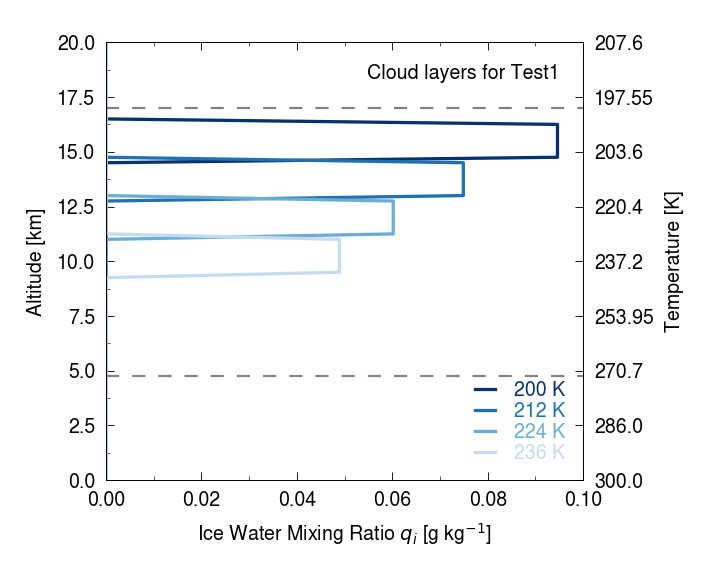

In [52]:
fontname  = 'Nimbus Sans'
fontsize  = 18
# my_colors = [(88/255,148/255,197/255), (169/255,23/255,38/255),
#              (229/255,179/255,69/255), (131/255,170/255,69/255),
#              (116/255,24/255,123/255), (202/255,91/255,46/255),
#              (107/255,188/255,233/255), 'grey']
my_colors = [cm.Blues(.99), cm.Blues(.75),
             cm.Blues(.5), cm.Blues(.25)]
length    = 9 # inches
heigth    = length*.8 # inches
f, ax     = plt.subplots(figsize = (length, heigth), dpi = 72)
plt.subplots_adjust(top = 0.925, bottom = 0.15, left = 0.15, right = 0.825)

h1 = ax.plot(q_ice[0]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[0], alpha = 1,
             label = '200 K perturbation level')
h2 = ax.plot(q_ice[7]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[1], alpha = 1,
             label = '212 K perturbation level')
h3 = ax.plot(q_ice[14]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[2], alpha = 1,
             label = '224 K perturbation level')
h4 = ax.plot(q_ice[-1]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[3], alpha = 1,
             label = '236 K perturbation level')

melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
h5 = ax.axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
h6 = ax.axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                dashes = (6, 6), linewidth  =2)

#ax.grid('on', linestyle = 'dashed', color = 'grey', alpha = .4,
#        dashes = (8, 8), linewidth = .8)

# X Axis:
ax.set_xlabel(r'Ice Water Mixing Ratio $q_{i}$ [g kg$^{-1}$]', 
              fontname = fontname, fontsize = fontsize,
              color = 'black', labelpad = 10)
major_ticks_x = np.arange(-1,1,.02)
minor_ticks_x = np.arange(-1,1,.01)
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_xlim(0, .1)
ax.tick_params(axis = 'x', which = 'major', color = 'black',
               size = 7, direction = 'in', top = True,
               labelsize = fontsize, pad = 10)
ax.tick_params(axis = 'x', which = 'minor',
               color = 'black', size = 4,
               direction = 'in', top = True)
for tick in ax.get_xticklabels():
    tick.set_fontname(fontname)
    
# Y Axis:
ax.set_ylabel('Altitude [km]', 
              fontname = fontname, fontsize = fontsize,
              color = 'black', labelpad = 10)
major_ticks_y = np.arange(-20, 30, 2.5)
minor_ticks_y = np.arange(-20, 30, 1.25)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)
ax.set_ylim(0, 20)
ax.tick_params(axis = 'y', which = 'major', color = 'black',
               size = 7, direction = 'in', right = True,
               labelsize = fontsize, pad = 10)
ax.tick_params(axis = 'y', which = 'minor',
               color = 'black', size = 4,
               direction = 'in', top = True)
for tick in ax.get_yticklabels():
    tick.set_fontname(fontname)
#ax.tick_params(axis = 'y', which = 'minor', color = 'black',
#               size = 4, direction = 'in', right = True)

# Right Y Axis:
ax2 = ax.twinx()
ax2.set_ylabel('Temperature [K]',
               fontname = fontname, fontsize = fontsize,
               color = 'black', labelpad = 10)
yticklabels1 = np.arange(0, 22.5, 2.5) # default altitude tick labels
yticklabels2 = tropical_profile['temperature (K)'].loc[tropical_profile['height (km)'].isin(yticklabels1)].to_list()    
ax2.set_yticks(yticklabels1)
ax2.set_yticklabels(yticklabels2)
ax2.tick_params(axis = 'y', which = 'major', color = 'black',
                size = 7, direction = 'in', right = True,
                labelsize = fontsize, pad = 10)
ax2.tick_params(axis = 'x', which = 'minor',
                color = 'black', size = 4,
                direction = 'in', top = True)
for tick in ax2.get_yticklabels():
    tick.set_fontname(fontname)

ax.text(0.95, 0.95, 'Cloud layers for Test1',
        fontname = fontname, fontsize = fontsize,
        color = 'black',
        ha = 'right', va = 'top', transform = ax.transAxes)

# Legend:
handles = h1 + h2 + h3 + h4
labels  = ['200 K', '212 K', '224 K', '236 K']    
legend  = plt.legend(handles, labels, loc = 'lower right',#bbox_to_anchor=(.675, 1.075),#
                     frameon = False, ncol = 1, columnspacing = 2,
                     labelspacing = .1, labelcolor = 'linecolor',
                     handlelength = 1, handletextpad = 1,
                     prop = {'family': fontname, 'size':fontsize})

# Save Figure:
#out_dir = ('/home/u5/edgardo/p01_crh_sensitivity/out_figures/')
plt.savefig('paper_figures/fs03.pdf', dpi = 300)

### Final Table

In [30]:
ds = xr.Dataset(
    data_vars = dict(
        temp = (['column'], temp_range),
        lw_emissivity = (['column'], lw_emissivity),
        sw_albedo = (['column'], sw_albedo),
        skin_temperature = (['column'], skin_temperature),
        cos_solar_zenith_angle = (['column'], cos_solar_zenith_angle),
        co2_vmr = (co2_vmr),
        ch4_vmr = (ch4_vmr),
        n2o_vmr = (n2o_vmr),
        o2_vmr  = (o2_vmr),
        pressure_hl = (['column', 'half_level'], pressure_hl),
        temperature_hl = (['column', 'half_level'], temperature_hl),
        q = (['column', 'level'], q),
        o3_mmr = (['column', 'level'], o3_mmr),
        q_liquid = (['column', 'level'], q_liquid),
        q_ice = (['column', 'level'], q_ice),
        re_liquid = (['column', 'level'], re_liquid),
        re_ice = (['column', 'level'], re_ice),
        cloud_fraction = (['column', 'level'], cloud_fraction),
    ),
    attrs = dict(
        title = '1D column input set for ecRad, Test1'),
)

In [31]:
out_dir1 = ('1-ecrad_inputs/')
out_dir2 = ('/groups/sylvia/ecrad_tests/ecrad_test_1/')
file     = 'input_1Dset_test1_v7a.nc'
ds.to_netcdf(path = out_dir1 + file)
ds.to_netcdf(path = out_dir2 + file)